# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 3: Regresión

__Número de grupo: 11__

__Nombres de los estudiantes: Javier Gómez Moraleda y Mario Alcolea Alcolea__

En este notebook trabajaremos con una colección de datos de alquileres de Airbnb en Amsterdam. El objetivo de este problema es entrenar una red neuronal capaz de predecir el precio del alojamiento a partir de un conjunto de características.

## 1) Descripción de los datos

Carga el fichero de datos `airbnb.csv` en un dataframe. Describe el conjunto de datos y trata de interpretar el significado de cada una de las variables. Estudia la distribución de precios.

In [1]:
import numpy as np
import pandas as pd

# Utilizamos el lector csv, cuyos valores aparecen separados por comas
df = pd.read_csv('airbnb.csv', delimiter=',')

# Mostramos la tabla resultante
df

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
0,4,2.0,2.0,1,1.0,52.358466,4.933843,2,8,3.279483,0,1,0,0,160.0
1,4,1.0,2.0,2,1.0,52.363589,4.983353,3,0,5.951843,0,1,0,0,120.0
2,2,1.0,1.0,1,1.0,52.375209,4.861647,3,8,2.601055,0,1,0,0,99.0
3,2,1.0,1.0,1,1.0,52.387382,4.890457,2,41,1.095138,0,0,1,0,100.0
4,2,1.0,1.0,1,1.0,52.384062,4.889877,3,0,0.844491,0,1,0,0,175.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,43.0,52.382970,4.873389,3,10,1.815773,0,1,0,0,140.0
14994,4,1.0,2.0,1,1.0,52.347479,4.833644,4,2,5.687407,1,1,0,0,120.0
14995,2,1.0,1.0,1,1.0,52.370400,4.918489,1,5,1.620395,0,1,0,0,120.0
14996,3,1.0,1.0,1,1.0,52.389637,4.879580,2,7,1.777881,0,1,0,0,95.0


### Estudio de los datos

Primero vamos a generar datos estadísticos de las variables para hacernos una pequeña idea sobre que pueden significar cada una de ellas.

In [2]:
df.describe()

,accommodates,bathrooms,bedrooms,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,distance_centre,instant_bookable,entire_home,private_room,shared_room,price
count,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000,14998.000000
mean,2.880317,1.116215,1.390919,1.499333,3.372316,52.365312,4.889033,2.885051,17.797440,2.998582,0.155954,0.777170,0.218562,0.004267,130.050273
std,1.298492,0.343442,0.839649,0.940643,11.203593,0.015765,0.035010,7.252271,34.766613,1.610995,0.362824,0.416159,0.413285,0.065187,63.820328
min,1.000000,0.000000,0.000000,1.000000,0.000000,52.290308,4.753513,1.000000,0.000000,0.115801,0.000000,0.000000,0.000000,0.000000,19.000000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,52.355582,4.864839,2.000000,2.000000,1.948924,0.000000,1.000000,0.000000,0.000000,89.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,52.364960,4.886370,2.000000,7.000000,2.841338,0.000000,1.000000,0.000000,0.000000,115.000000
75%,4.000000,1.000000,2.000000,2.000000,1.000000,52.374805,4.907953,3.000000,18.000000,3.577086,0.000000,1.000000,0.000000,0.000000,150.000000
max,17.000000,8.000000,10.000000,16.000000,106.000000,52.426224,5.027689,523.000000,496.000000,11.842162,1.000000,1.000000,1.000000,1.000000,440.000000


##### Significado de las variables

accommodates: Número máximo de huéspedes permitidos.

bathrooms: Número de baños.

bedrooms: Número de habitaciones.

guests_included: Número de invitados permitidos.

host_listings_count: Número de propietarios.

latitude: Latitud.

longitude: Longitud.

minimum_nights: Número mínimo de noches.

number_of_reviews: Número de reseñas.

distance_centre: Distancia al centro de Amsterdam.

instant_bookable: Booleano que indica si es posible realizar una reserva inmediata.

entire_home: Booleano que indica si es una casa/apartamento completo.

private_room: Booleano que indica si es una habitación privada.

shared_room: Booleano que índica si es una habitación compartida.

price: Precio por noche (suponemos dólares).

##### Distribución de los precios

<AxesSubplot:ylabel='Frequency'>

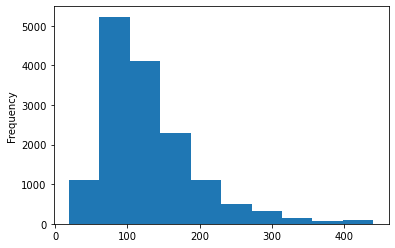

In [3]:
df['price'].plot.hist()

Como vemos en la gráfica, su distribución es asimétrica y el precio con mayor frecuencia es 100. Además, la mayoría de precios están en torno a 100-200 y a medida que va aumentando, menor frecuencia tiene.

## 2) Selección de variables

Calcula los coeficientes de correlación de Pearson entre la variable de salida y el resto de variables. Crea un nuevo dataframe que contenga el precio y, además, las variables que estén relacionadas con él por un valor de correlacción de al menos 0.2 (de forma directa o inversa).

Vamos a calcular los coeficientes de correlación de la variable precio respecto a las demás. Para ello, calculamos todos los coeficientes 2 a 2 y nos quedamos únicamente con la columna 'price'

In [4]:
# Coeficientes de correlacion de Pearson
df.corr(method='pearson')['price']

accommodates           0.552183
bathrooms              0.283759
bedrooms               0.517237
guests_included        0.338739
host_listings_count    0.109141
latitude               0.027922
longitude              0.035887
minimum_nights         0.007708
number_of_reviews     -0.088437
distance_centre       -0.204698
instant_bookable      -0.004410
entire_home            0.361313
private_room          -0.357184
shared_room           -0.042109
price                  1.000000
Name: price, dtype: float64

In [5]:
# Columnas que vamos a seleccionar, aquellas con un valor de correlación de al menos 0.2
selected_columns = ['accommodates', 'bathrooms', 'bedrooms', 'guests_included', 'distance_centre', 
                    'entire_home', 'private_room', 'price']

# Creamos un nuevo dataframe con esas columnas
df_new = pd.DataFrame(df, columns=selected_columns)

# Mostramos el resultado
df_new

,accommodates,bathrooms,bedrooms,guests_included,distance_centre,entire_home,private_room,price
0,4,2.0,2.0,1,3.279483,1,0,160.0
1,4,1.0,2.0,2,5.951843,1,0,120.0
2,2,1.0,1.0,1,2.601055,1,0,99.0
3,2,1.0,1.0,1,1.095138,0,1,100.0
4,2,1.0,1.0,1,0.844491,1,0,175.0
...,...,...,...,...,...,...,...,...
14993,2,1.0,1.0,1,1.815773,1,0,140.0
14994,4,1.0,2.0,1,5.687407,1,0,120.0
14995,2,1.0,1.0,1,1.620395,1,0,120.0
14996,3,1.0,1.0,1,1.777881,1,0,95.0


## 3) Normalización

Decide si debes o no normalizar los datos. En caso afirmativo elige razonadamente entre escalarlos o estandarizarlos.

Si decides escalar los datos deberás crear dos `scalers` distintos, uno para el array con la descripción de los pisos y otro para el array con el precio. Lo hacemos de este modo porque así podremos desescalar las predicciones más fácilmente.

Hemos decidido normalizar los datos y en concreto escalarlos. Lo hacemos porque así reducimos el tiempo de entrenamiento y evitamos mínimos locales en la optimización del error.

In [6]:
from sklearn.preprocessing import StandardScaler

# Transformamos las variables de entrada
scaler_x = StandardScaler()
scaler_x.fit(df_new.drop(['price'], axis=1).values)
data_scaled= scaler_x.transform(df_new.drop(['price'], axis=1).values)

# Y también transformamos la variable de salida
scaler_y = StandardScaler()
scaler_y.fit(df_new['price'].values.reshape(-1, 1)) # Como es una sola variable es necesario ponerlo en modo columna
target_scaled=scaler_y.transform(df_new['price'].values.reshape(-1, 1))

## 4) Entrenamiento y selección

Crea dos redes neuronales de tipo Perceptrón Multicapa:
- La primera con una capa oculta de 200 neuronas
- La segunda con dos capas ocultas cada una de 100 neuronas

Pinta la curva de aprendizaje para cada red variando el parámetro `alpha` que controla el coeficiente de regularización L2 y determina el valor óptimo usando validación cruzada. Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).

¿Alguna de las dos redes domina a la otra? ¿Por qué crees que se producen las diferencias?

Vamos a ejecutar primero la red neuronal con una capa oculta de 200 neuronas.

In [7]:
RANDOM_STATE=333

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

cv_scores_mean=[]
cv_scores_std=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean.append(scores.mean())
    cv_scores_std.append(scores.std())

cv_scores_mean, cv_scores_std

([-0.5015792651373208,
  -0.5056569462264315,
  -0.5084204672073943,
  -0.5072291979532284,
  -0.5074247879443388,
  -0.5077170828882911],
 [0.01872737888521294,
  0.019781005554062054,
  0.0205545138587295,
  0.020507579764440485,
  0.021208427147934986,
  0.02010147015037144])

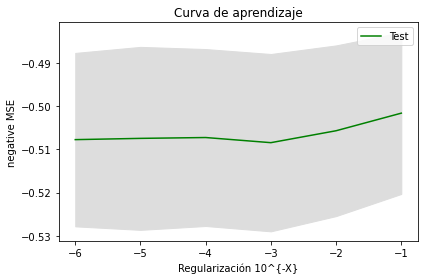

In [9]:
import matplotlib.pyplot as plt

# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean) - np.array(cv_scores_std)
upper_limit = np.array(cv_scores_mean) + np.array(cv_scores_std)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Ahora haremos la red neuronal con 2 capas de 100 neuronas cada una.

In [10]:
cv_scores_mean2=[]
cv_scores_std2=[]

# Entrenar y validar distintas configuraciones
regul_param_range = 10.0 ** -np.arange(1, 7) # [0.1, 0.01, ..., 0.0000001]
for regul_param in regul_param_range:
    # Aumentamos el parámetro max_iter hasta que converja
    mlp=MLPRegressor(hidden_layer_sizes=(100,100, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
    # El error es neg_mean_squared_error el MSE en negativo!! Más pequeño peor.
    scores2 = cross_val_score(mlp, data_scaled, target_scaled.ravel(), cv=5, scoring='neg_mean_squared_error')
    
    cv_scores_mean2.append(scores2.mean())
    cv_scores_std2.append(scores2.std())

cv_scores_mean2, cv_scores_std2

([-0.5022401319692171,
  -0.5212723846927604,
  -0.530903750393929,
  -0.5558301501345139,
  -0.5364957151102627,
  -0.5351471772454088],
 [0.019461952672887077,
  0.02322501695727659,
  0.016220808847205323,
  0.01952549060917959,
  0.02114182973415163,
  0.016678367762591698])

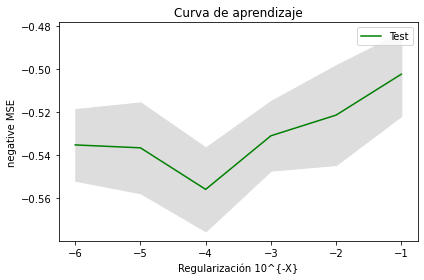

In [11]:
# Dibujamos la línea de la exactitud media en las partes de test
plt.plot(np.log10(regul_param_range), cv_scores_mean2, color="g", label="Test")

# Dibujamos la banda de la desviación típica
lower_limit = np.array(cv_scores_mean2) - np.array(cv_scores_std2)
upper_limit = np.array(cv_scores_mean2) + np.array(cv_scores_std2)
plt.fill_between(np.log10(regul_param_range), lower_limit, upper_limit, color="#DDDDDD")

# Creamos el gráfico
plt.title("Curva de aprendizaje")
plt.xlabel("Regularización 10^{-X}"), plt.ylabel("negative MSE"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

Realmente, ninguna domina a la otra ya que obtenemos el mismo valor final de aprendizaje en ambas redes neuronales, pero si tenemos, como podemos comprobar, unas gráficas muy diferentes. Estas diferencias ocurren ya que la red neuronal con 2 capas, aprende con diferentes niveles de abstracción de los datos.

## 5) Medición del error

Elige la mejor configuración del apartado anterior y usa la función `cross_val_predict` para realizar una predicción del valor de todos los establecimientos usando validación cruzada. ¿Cuál es el error medio del modelo en euros? ¿Crees que el modelo es suficientemente bueno?

Pinta la distribución del error en euros y el diagrama de dispersión de la predicción frente al valor real. ¿El modelo comete los mismos tipos de errores en establecimientos de distintos precios? ¿Por qué crees que se producen esos errores?

Hemos elegido la configuración con una capa oculta y 200 neuronas.

In [12]:
from sklearn.model_selection import cross_val_predict

# Creamos el clasificador
regul_param=0.1
mlp = MLPRegressor(hidden_layer_sizes=(200, ), activation='relu', solver='adam', alpha=regul_param, batch_size=100, 
             learning_rate='constant', learning_rate_init=0.001, max_iter=500, random_state=RANDOM_STATE)
    
# estimamos 
predicts_scaled = cross_val_predict(mlp, data_scaled, target_scaled.ravel(), cv=10)

# desescalamos las predicciones para que estén en la escala original
predicts=scaler_y.inverse_transform(predicts_scaled)

In [13]:
errors = np.abs(df_new['price'].values.reshape(-1, 1) - predicts) # error en cada ejemplo
mean_error = np.mean(errors)
std_error = np.std(errors)
mean_price = np.mean(df_new['price'])

print('Error medio:', mean_error)
print('Desviación típica:', std_error)
print('Error medio en %:', mean_error/mean_price*100)

Error medio: 58.07299568928267
Desviación típica: 52.53743723035447
Error medio en %: 44.6542665267292


Tenemos un error medio de 58 dólares que en porcentaje representa el 44.6%. El modelo nos da unos resultados bastante malos, con una desviación típica de 52.5 dólares, por lo que, si nos fijamos en la distribución de precios y vemos que la mayoría se encuentra concentrada en torno a 100-150 dólares, el error es enorme.

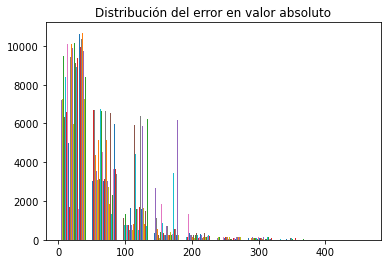

In [14]:
# Dibujamos el histograma de los errores
fig1 = plt.figure()
ax1 = plt.axes()
ax1.hist(errors)

plt.title('Distribución del error en valor absoluto')
plt.show()

En esta gráfica podemos ver la distribución del error. Encontramos la mayor parte del error en la parte izquierda de la gráfica y se va reduciendo, pero aún así siguen siendo unos valores para el error demasiado altos y que no deseamos.

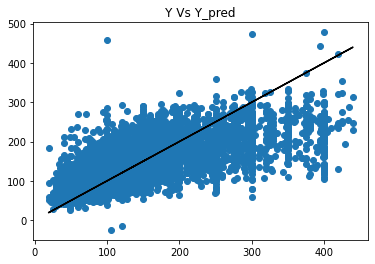

In [15]:
fig2 = plt.figure()
ax2 = plt.axes()

# dibujamos los errores: la distancia a la recta indica el nivel de error
ax2.scatter(df_new['price'], predicts) 
# Pintamos la referencia de la predicción perfecta
ax2.plot(df_new['price'],df_new['price'], color='k') 

plt.title('Y Vs Y_pred')
plt.show()

Los errores en los distintos precios son muy parecidos, aunque cada vez que vamos aumentando el precio, se va distanciando de la recta. Esto lo que nos indica es que la mayor desviación se produce a partir de los valores Y = 300, aunque el rango es grande en los valores anteriores y hay casos concretos muy desviados.
En conclusión sacamos que es muy mejorable, y sobre todo a partir de precios más altos.